In [55]:
import pandas as pd
import os
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

## Data Input

1. Buat folder **import**
2. Masukkan file data yang ingin diinput ke dalam folder **import**
3. Kita akan memasukkan semua data pada folder **import** ke dalam satu **DataFrame**
   **DataFrame** adalah objek tabel dalam pandas-python ini serupa dengan spreadsheet pada excel

In [56]:
data = pd.DataFrame()

for file in os.listdir("import"):
    file_location = "import/"+file
    tables = pd.read_html(file_location, header=1, converters={"Kode Destinasi": str})
    data = pd.concat([data, tables[0]])
data

,No,Tanggal,Id Order,Resi,Status Resi,Nama Penerima,Kecamatan,Pengirim,No HP Pengirim,Payment,...,HPP,Alamat Lengkap,Provinsi,Kota/Kabupaten,No Hp Penenerima,Kode Pos,Kode Destinasi,Catatan,Asal Leads,Bukti Transfer
0,1,2022-09-01 07:46:23,75848,0822122200554739,onprocess,Untung R,Ciledug,Monika,0858912671292,COD,...,Rp. 35000,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...,Banten,Kota Tangerang,15153,TGR10036,+628978329387,-,UPI,-
1,2,2022-09-01 07:57:02,75849,-,cancel,Rany,Setia Budi,Ulum,6285711368283,BRI,...,Rp. 35000,Apartemen Taman Sari Semanggi Tower A unit 22-...,DKI Jakarta,Kota Jakarta Selatan,12930,CGK10208,+6283870654162,-,EVA,https://prnt.sc/2t3X9imINku-
2,3,2022-09-01 07:57:28,75850,0827492100042142,onprocess,Rany,Setia Budi,Tia,6285711368283,BRI,...,Rp. 35000,Apartemen Taman Sari Semanggi Tower A unit 22-...,DKI Jakarta,Kota Jakarta Selatan,12930,CGK10208,+6283870654162,-,EVA,https://prnt.sc/2t3X9imINku-
3,4,2022-09-01 08:09:13,75851,0827492100042159,onprocess,Irwansyah,Sukmajaya,Wiwi,6285718018935,BCA,...,Rp. 32500,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...,Jawa Barat,Kota Depok,16417,DPK10062,62811973234,hubungi customer sebelum paket akan diantarkan...,NURDIN,https://prnt.sc/QY1V7Y1LdgBC
4,5,2022-09-01 08:12:03,75852,0822122200554747,onprocess,Gazali ansyar,Malinau Utara,Heru,6285882820059,COD,...,Rp. 35000,jalan poros kaltim rt 3 Patokan rumah gudang s...,Kalimantan Utara,Kab. Malinau,77554,TRK20207,+6281350941150,-,NURDIN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,12074,2022-10-31 23:32:31,99131,0822122200771085,onprocess,Tati herawati,Gunung Putri,Eva,6285882820059,COD,...,Rp. 32500,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...,Jawa Barat,Kab. Bogor,16962,BOO20159,6281311593492,hubungi cust saat paket akan diantar ke alamat,EVA,-
12074,12075,2022-10-31 23:48:59,99132,0822122200771093,onprocess,Sri Mulyati,Ciledug,Yosi,085891267127,COD,...,Rp. 97500,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...,Banten,Kota Tangerang,15153,TGR10036,+6281586063091,hub cust saat paket akan diantar ke alamat,ILHAM,-
12075,12076,2022-10-31 23:52:05,99133,0822122200771101,onprocess,Alam Pramaditha,Cigugur,Yosi,085891267127,COD,...,Rp. 35000,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K...",Jawa Barat,Kab. Kuningan,45552,CBN20206,+6282120162626,hub cust saat paket akan diantar ke alamat,FIQI,-
12076,12077,2022-10-31 23:52:08,99134,0822122200771119,onprocess,Jaka,Samaturu,Eva,6285882820059,COD,...,Rp. 105000,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...,Sulawesi Tenggara,Kab. Kolaka,93915,KDI20216,6282298272416,hubungi cust saat paket akan diantar ke alamat,EVA,-


## Data Preprocessing
Data preprocessing yang akan kita lakukan adalah
1. Mengambil Kolom data yang diperlukan saja
   Kolom yang akan kita ambil **["Kode Destinasi","Id Order", "Tanggal", "Pcs", "Nominal Transaksi", "Detail Pesanan", "Nama Penerima", "Alamat Lengkap"]**
2. Rename nama kolom
3. Mengubah tipe data
4. Membersihkan format nama
5. Membersihkan format nomor HP
6. Membersihkan data item
7. Membersihkan data pcs
8. Membersihkan data grand total
9. Set phone number sebagai customer id

### Mengambil kolom data yang diperlukan

In [57]:
data = data[["Kode Destinasi","Id Order", "Tanggal", "Pcs", "Nominal Transaksi", "Detail Pesanan", "Nama Penerima", "Alamat Lengkap"]]
data

,Kode Destinasi,Id Order,Tanggal,Pcs,Nominal Transaksi,Detail Pesanan,Nama Penerima,Alamat Lengkap
0,+628978329387,75848,2022-09-01 07:46:23,1 pcs,Rp. 184000,1 Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...
1,+6283870654162,75849,2022-09-01 07:57:02,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...
2,+6283870654162,75850,2022-09-01 07:57:28,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...
3,62811973234,75851,2022-09-01 08:09:13,1 pcs,Rp. 184000,1 Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...
4,+6281350941150,75852,2022-09-01 08:12:03,1 pcs,Rp. 263000,1 Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...
...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31 23:32:31,1 pcs,Rp. 189000,1 Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...
12074,+6281586063091,99132,2022-10-31 23:48:59,3 pcs,Rp. 350000,3 Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...
12075,+6282120162626,99133,2022-10-31 23:52:05,1 pcs,Rp. 200000,1 Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K..."
12076,6282298272416,99134,2022-10-31 23:52:08,3 pcs,Rp. 439000,3 Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...


### Rename nama kolom

In [58]:
data = data.rename(columns={
    "Kode Destinasi": "phone", 
    "Tanggal": "order_date", 
    "Id Order":"order_id",
    "Pcs": "order_size",
    "Nominal Transaksi":"grand_total",
    "Detail Pesanan": "item",
    "Nama Penerima": "name",
    "Alamat Lengkap": "address"})

data

,phone,order_id,order_date,order_size,grand_total,item,name,address
0,+628978329387,75848,2022-09-01 07:46:23,1 pcs,Rp. 184000,1 Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...
1,+6283870654162,75849,2022-09-01 07:57:02,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...
2,+6283870654162,75850,2022-09-01 07:57:28,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...
3,62811973234,75851,2022-09-01 08:09:13,1 pcs,Rp. 184000,1 Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...
4,+6281350941150,75852,2022-09-01 08:12:03,1 pcs,Rp. 263000,1 Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...
...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31 23:32:31,1 pcs,Rp. 189000,1 Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...
12074,+6281586063091,99132,2022-10-31 23:48:59,3 pcs,Rp. 350000,3 Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...
12075,+6282120162626,99133,2022-10-31 23:52:05,1 pcs,Rp. 200000,1 Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K..."
12076,6282298272416,99134,2022-10-31 23:52:08,3 pcs,Rp. 439000,3 Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...


### Mengubah tipe data

In [59]:
retention_data = data

retention_data["order_date"] = pd.to_datetime(retention_data["order_date"], dayfirst=True).dt.date
retention_data['order_date'] = pd.to_datetime(retention_data['order_date'])

retention_data

,phone,order_id,order_date,order_size,grand_total,item,name,address
0,+628978329387,75848,2022-09-01,1 pcs,Rp. 184000,1 Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...
1,+6283870654162,75849,2022-09-01,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...
2,+6283870654162,75850,2022-09-01,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...
3,62811973234,75851,2022-09-01,1 pcs,Rp. 184000,1 Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...
4,+6281350941150,75852,2022-09-01,1 pcs,Rp. 263000,1 Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...
...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31,1 pcs,Rp. 189000,1 Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...
12074,+6281586063091,99132,2022-10-31,3 pcs,Rp. 350000,3 Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...
12075,+6282120162626,99133,2022-10-31,1 pcs,Rp. 200000,1 Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K..."
12076,6282298272416,99134,2022-10-31,3 pcs,Rp. 439000,3 Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...


### Membersihkan format Nama

In [60]:
import re

def name_cleansing(x):
    x = x.lower()
    list_of_title = [
        "ibu ", "bu ", "hj ", "h ", "bpk ", "pak ", "pa ", "bapak ", "hj. ", "h. ", "a ", "bpk. ", "l ", "lik ", "i ", "wayan ", "m ", "m."
    ]
    regex = re.compile('|'.join(map(re.escape, list_of_title)))
    result = regex.sub("", str(x))
    
    return result.lstrip().title() 

retention_data["clean_name"] = retention_data["name"].str.replace('^\d+\s+', '')
retention_data["clean_name"] = retention_data["clean_name"].apply(lambda x: name_cleansing(str(x)))
retention_data

,phone,order_id,order_date,order_size,grand_total,item,name,address,clean_name
0,+628978329387,75848,2022-09-01,1 pcs,Rp. 184000,1 Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...,Untung R
1,+6283870654162,75849,2022-09-01,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany
2,+6283870654162,75850,2022-09-01,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany
3,62811973234,75851,2022-09-01,1 pcs,Rp. 184000,1 Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...,Irwansyah
4,+6281350941150,75852,2022-09-01,1 pcs,Rp. 263000,1 Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...,Gazalansyar
...,...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31,1 pcs,Rp. 189000,1 Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...,Tatherawati
12074,+6281586063091,99132,2022-10-31,3 pcs,Rp. 350000,3 Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...,Srmulyati
12075,+6282120162626,99133,2022-10-31,1 pcs,Rp. 200000,1 Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K...",Alapramaditha
12076,6282298272416,99134,2022-10-31,3 pcs,Rp. 439000,3 Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...,Jaka


### Membersihkan format nomor HP

In [61]:
def normalize_phone(x):
    if x[0:1] == "+":
        return x[1:]
    if x[0:1] == "0":
        return "62"+x[1:]
    if x[0:1] == "8":
        return "62"+x
    return x

retention_data["normalized_phone"] = retention_data["phone"].apply(lambda x: normalize_phone(str(x)))
retention_data

,phone,order_id,order_date,order_size,grand_total,item,name,address,clean_name,normalized_phone
0,+628978329387,75848,2022-09-01,1 pcs,Rp. 184000,1 Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...,Untung R,628978329387
1,+6283870654162,75849,2022-09-01,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
2,+6283870654162,75850,2022-09-01,1 pcs,Rp. 175000,1 Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
3,62811973234,75851,2022-09-01,1 pcs,Rp. 184000,1 Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...,Irwansyah,62811973234
4,+6281350941150,75852,2022-09-01,1 pcs,Rp. 263000,1 Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...,Gazalansyar,6281350941150
...,...,...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31,1 pcs,Rp. 189000,1 Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...,Tatherawati,6281311593492
12074,+6281586063091,99132,2022-10-31,3 pcs,Rp. 350000,3 Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...,Srmulyati,6281586063091
12075,+6282120162626,99133,2022-10-31,1 pcs,Rp. 200000,1 Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K...",Alapramaditha,6282120162626
12076,6282298272416,99134,2022-10-31,3 pcs,Rp. 439000,3 Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...,Jaka,6282298272416


### Membersihkan data item

In [62]:
retention_data["item"] = retention_data["item"].str.replace('^\d+\s+', '') ## replace numeric dengan empty string
retention_data

,phone,order_id,order_date,order_size,grand_total,item,name,address,clean_name,normalized_phone
0,+628978329387,75848,2022-09-01,1 pcs,Rp. 184000,Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...,Untung R,628978329387
1,+6283870654162,75849,2022-09-01,1 pcs,Rp. 175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
2,+6283870654162,75850,2022-09-01,1 pcs,Rp. 175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
3,62811973234,75851,2022-09-01,1 pcs,Rp. 184000,Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...,Irwansyah,62811973234
4,+6281350941150,75852,2022-09-01,1 pcs,Rp. 263000,Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...,Gazalansyar,6281350941150
...,...,...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31,1 pcs,Rp. 189000,Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...,Tatherawati,6281311593492
12074,+6281586063091,99132,2022-10-31,3 pcs,Rp. 350000,Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...,Srmulyati,6281586063091
12075,+6282120162626,99133,2022-10-31,1 pcs,Rp. 200000,Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K...",Alapramaditha,6282120162626
12076,6282298272416,99134,2022-10-31,3 pcs,Rp. 439000,Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...,Jaka,6282298272416


### Membersihkan data pcs

In [63]:
retention_data["order_size"] = retention_data["order_size"].str.replace('[^0-9]', '') ## replace non numeric dengan empty string
retention_data

,phone,order_id,order_date,order_size,grand_total,item,name,address,clean_name,normalized_phone
0,+628978329387,75848,2022-09-01,1,Rp. 184000,Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...,Untung R,628978329387
1,+6283870654162,75849,2022-09-01,1,Rp. 175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
2,+6283870654162,75850,2022-09-01,1,Rp. 175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
3,62811973234,75851,2022-09-01,1,Rp. 184000,Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...,Irwansyah,62811973234
4,+6281350941150,75852,2022-09-01,1,Rp. 263000,Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...,Gazalansyar,6281350941150
...,...,...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31,1,Rp. 189000,Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...,Tatherawati,6281311593492
12074,+6281586063091,99132,2022-10-31,3,Rp. 350000,Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...,Srmulyati,6281586063091
12075,+6282120162626,99133,2022-10-31,1,Rp. 200000,Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K...",Alapramaditha,6282120162626
12076,6282298272416,99134,2022-10-31,3,Rp. 439000,Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...,Jaka,6282298272416


In [64]:
retention_data["grand_total"] = retention_data["grand_total"].str.replace('[^0-9]', '').astype(int)
retention_data

,phone,order_id,order_date,order_size,grand_total,item,name,address,clean_name,normalized_phone
0,+628978329387,75848,2022-09-01,1,184000,Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...,Untung R,628978329387
1,+6283870654162,75849,2022-09-01,1,175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
2,+6283870654162,75850,2022-09-01,1,175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162
3,62811973234,75851,2022-09-01,1,184000,Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...,Irwansyah,62811973234
4,+6281350941150,75852,2022-09-01,1,263000,Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...,Gazalansyar,6281350941150
...,...,...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31,1,189000,Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...,Tatherawati,6281311593492
12074,+6281586063091,99132,2022-10-31,3,350000,Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...,Srmulyati,6281586063091
12075,+6282120162626,99133,2022-10-31,1,200000,Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K...",Alapramaditha,6282120162626
12076,6282298272416,99134,2022-10-31,3,439000,Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...,Jaka,6282298272416


### Set Phone Number sebagai customer id

In [65]:
retention_data["customer"] = retention_data["phone"].apply(lambda x: normalize_phone(str(x)))
retention_data

,phone,order_id,order_date,order_size,grand_total,item,name,address,clean_name,normalized_phone,customer
0,+628978329387,75848,2022-09-01,1,184000,Ratik,Untung R,Jln. H. Mencong RT 01 RW 07 Gg. H. Bilin Patok...,Untung R,628978329387,628978329387
1,+6283870654162,75849,2022-09-01,1,175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162,6283870654162
2,+6283870654162,75850,2022-09-01,1,175000,Ratik,Rany,Apartemen Taman Sari Semanggi Tower A unit 22-...,Rany,6283870654162,6283870654162
3,62811973234,75851,2022-09-01,1,184000,Dukosam,Irwansyah,Jln Proklamasi PERUMAHAN TAMAN CIPAYUNG BLOK 2...,Irwansyah,62811973234,62811973234
4,+6281350941150,75852,2022-09-01,1,263000,Ratik,Gazali ansyar,jalan poros kaltim rt 3 Patokan rumah gudang s...,Gazalansyar,6281350941150,6281350941150
...,...,...,...,...,...,...,...,...,...,...,...
12073,6281311593492,99131,2022-10-31,1,189000,Dukosam,Tati herawati,kp tlajung udik RT 02 RW 04 Kel/Desa Tlajung U...,Tatherawati,6281311593492,6281311593492
12074,+6281586063091,99132,2022-10-31,3,350000,Dukosam,Sri Mulyati,Komplek Pondok Lakah Permai Blok K 25 Rt2/Rw16...,Srmulyati,6281586063091,6281586063091
12075,+6282120162626,99133,2022-10-31,1,200000,Madu Lamain,Alam Pramaditha,"Lingkungan Manis Rt05/Rw02 Kel/Desa Cigugur, K...",Alapramaditha,6282120162626,6282120162626
12076,6282298272416,99134,2022-10-31,3,439000,Ratik,Jaka,Dusun 4 Matirowalie ( Dekat kantor Desa Liku S...,Jaka,6282298272416,6282298272416


## Data Processing

Pada data processing kali ini kita akan membuat RFM Tabel dan RFM Class yang perlu dilakukan adalah
1. Membuat RFM tabel menggunakan data agregat
   a. max order date sebagai recency
   b. banyaknya order sebagai frequency
   c. jumlah grand_total sebagai monetary
2. Membuat klasifikasi RFM
    

### Membuat RFM Tabel

In [66]:
import datetime as dt
NOW = retention_data["order_date"].max() ### ambil tanggal order terakhir sebagai tanggal hari ini

rfmTable = retention_data.groupby('customer').agg({'order_date': lambda x: (x.max() - NOW).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'grand_total': lambda x: x.sum()}) # Monetary Value

rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'grand_total': 'monetary_value'}, inplace=True)

rfmTable.sort_values(by=["frequency"], ascending=False).head() ## check rfmTable

,recency,frequency,monetary_value
customer,,,
6285171681254,-19,24,56575000
6285693885800,-8,23,22060000
6285777645572,-4,22,370103000
6285643275771,-2,22,172830000
628888507276,-1,20,1208683000


### Membuat klasifikasi RFM
Kita akan membuat kategori/kelas untuk tiap attribut recency, frequency, dan monetery_value.
Metode yang digunakan untuk kelas recency dan monetery value adalah dengan menggunakan kuantil. Kita akan membagi data recency dan monetery ke dalam 5 kelas berdasarkan kuantil.

Sedangkan untuk frequency kita akan menggunakan ketegorisasi seperti ini
1. Jika frequency pembelian adalah 1 maka kita beri dia kelas 1
2. Jika frequency pembelian adalah 2 maka kita beri dia kelas 2
3. Jika frequency pembelian adalah 3 maka kita beri dia kelas 3
4. Jika frequency pembelian adalah 4 maka kita beri dia kelas 4
5. Jika frequency pembelian adalah 5 atau lebih maka kita beri dia kelas 5

In [67]:
def FClassMap(x):
    class_map = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    "other": 5 
}
    if x in class_map:
        return class_map[x]
    else:
        return class_map["other"]

rfmSegmentation = rfmTable.copy()
rfmSegmentation['R_Class'] = pd.qcut(rfmSegmentation['recency'], q=5, labels=[1,2,3,4,5])
rfmSegmentation['F_Class'] = rfmSegmentation['frequency'].apply(FClassMap)
rfmSegmentation['M_Class'] = pd.qcut(rfmSegmentation['monetary_value'], q=5, labels=[1,2,3,4,5])

rfmSegmentation

,recency,frequency,monetary_value,R_Class,F_Class,M_Class
customer,,,,,,
18632563333,-50,1,408000,2,1,5
282166094891,-63,1,213000,1,1,2
491777703321,-76,1,189000,1,1,1
601114212102,-17,1,410000,4,1,5
601119608520,-77,1,245000,1,1,3
...,...,...,...,...,...,...
966509279128,-48,1,375000,2,1,4
966556949274,-11,1,180000,5,1,1
966558256036,-15,1,198000,4,1,1


### Membuat kelas RFM
Kelas RFM ini adalah gabungan dari kategori Recency + kategori Frequency + kategori Monetary

In [68]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Class.astype(str) \
                           + rfmSegmentation.F_Class.astype(str) \
                            + rfmSegmentation.M_Class.astype(str)
rfmSegmentation

,recency,frequency,monetary_value,R_Class,F_Class,M_Class,RFMClass
customer,,,,,,,
18632563333,-50,1,408000,2,1,5,215
282166094891,-63,1,213000,1,1,2,112
491777703321,-76,1,189000,1,1,1,111
601114212102,-17,1,410000,4,1,5,415
601119608520,-77,1,245000,1,1,3,113
...,...,...,...,...,...,...,...
966509279128,-48,1,375000,2,1,4,214
966556949274,-11,1,180000,5,1,1,511
966558256036,-15,1,198000,4,1,1,411


## Data Visualization

Kita akan mencoba membuat visualisasi data dari hasil pengolahan data di atas


### Scatter plot 

kita akan coba melihat persebaran data berdasarkan recency, frequency, dan monetary value menggunakan scatter plot

<AxesSubplot: xlabel='recency', ylabel='frequency'>

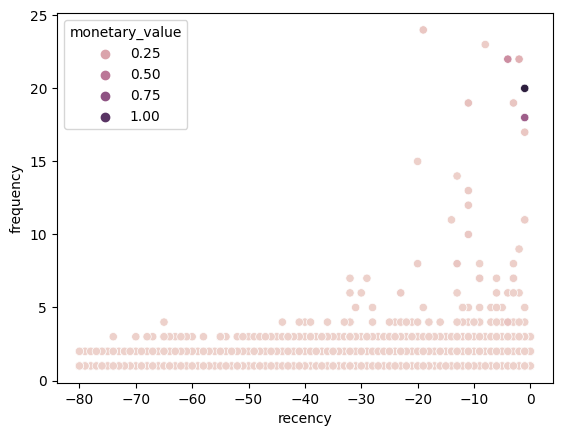

In [69]:
sns.scatterplot(data=rfmSegmentation, x='recency', y='frequency', hue='monetary_value')

### heat map kategori RFM

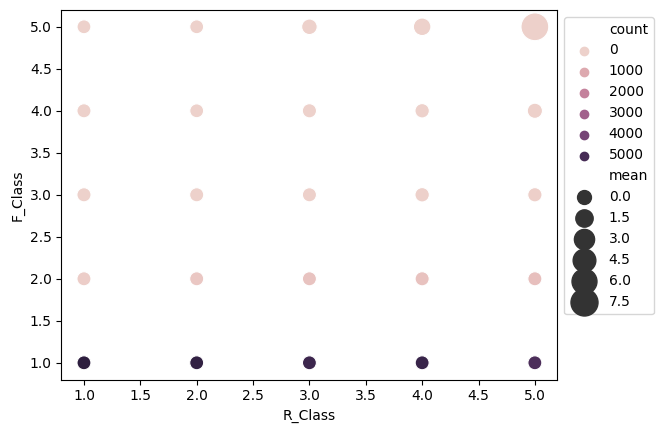

In [70]:
plotdata = rfmSegmentation.groupby(['F_Class', 'R_Class']).agg(['sum','count', 'mean'])['monetary_value']

ax = sns.scatterplot(data=plotdata, x='R_Class', y='F_Class', size=plotdata['mean'].fillna(0), hue=plotdata['count'], sizes=(100, 400))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Filtering & Ekspor Data

Pada bagian kali ini kita akan mencoba melakukan filtering dan ekspor data ke file exce.
1. Kita mau ambil data dengan rfm class 555
2. Ekspor ke file excel

### Filter Data

In [71]:
filtered_data = rfmSegmentation.query("RFMClass == '555'")
filtered_data

,recency,frequency,monetary_value,R_Class,F_Class,M_Class,RFMClass
customer,,,,,,,
62811858344,-12,5,2274000,5,5,5,555
6281210883892,-11,5,1900000,5,5,5,555
6281219634553,-12,5,2800000,5,5,5,555
6281220201435,-3,7,2520000,5,5,5,555
6281234565433,-11,19,85995000,5,5,5,555
6281240970823,-9,8,3785000,5,5,5,555
6281246131424,-2,6,2370000,5,5,5,555
6281281189022,-11,12,33236000,5,5,5,555
6281288886333,-7,5,2522000,5,5,5,555


### Export to excel

In [72]:
filtered_data.to_excel("export/data_export.xlsx", index=False)